In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import GRU, Dense
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error

# DATASET BITCOIN

In [2]:
# Read data from the CSV file
data = pd.read_csv('Bitcoin Historical Data.csv')
data = data.dropna()

data['Date'] = pd.to_datetime(data['Date'], format='%m/%d/%Y')
# Format column "Price", "Open", "High", "Low"
for col in ['Price', 'Open', 'High', 'Low']:
    data[col] = data[col].str.replace(',', '').astype(float)
data = data.sort_index(ascending=False)
data = data.reset_index(drop=True)

data

,Date,Price,Open,High,Low,Vol.,Change %
0,2013-03-01,34.5,33.4,34.9,32.9,39.79K,3.36%
1,2013-03-02,34.3,34.5,34.8,33.2,36.66K,-0.72%
2,2013-03-03,34.5,34.3,34.5,33.8,12.53K,0.73%
3,2013-03-04,36.2,34.5,36.7,34.2,46.77K,4.78%
4,2013-03-05,40.3,36.2,40.7,36.2,85.43K,11.56%
...,...,...,...,...,...,...,...
4106,2024-05-28,68366.0,69428.3,69560.7,67299.9,71.39K,-1.53%
4107,2024-05-29,67635.8,68366.2,68897.6,67143.2,52.13K,-1.07%
4108,2024-05-30,68354.7,67631.3,69504.7,67138.4,66.84K,1.06%
4109,2024-05-31,67530.1,68352.3,69018.2,66676.8,61.51K,-1.21%


In [3]:
data1 = data.reset_index()['Price']
data1

0          34.5
1          34.3
2          34.5
3          36.2
4          40.3
         ...   
4106    68366.0
4107    67635.8
4108    68354.7
4109    67530.1
4110    67760.8
Name: Price, Length: 4111, dtype: float64

In [4]:
#Scaler data
scaler = MinMaxScaler(feature_range=(0, 1))
data1 = scaler.fit_transform(np.array(data1).reshape(-1, 1))
data1

array([[2.73852558e-06],
       [0.00000000e+00],
       [2.73852558e-06],
       ...,
       [9.35485814e-01],
       [9.24194873e-01],
       [9.27353763e-01]])

### RATIO 6:4

In [5]:
# Split the data into training and testing sets 6:4
train_size = int(0.6 * len(data1))
test_size = len(data1) - train_size

train_data = data1[:train_size]
test_data = data1[train_size:]

In [6]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset) - time_step - 1):
        a = dataset[i:(i + time_step), 0]  # i=0, X=0,1,2,3-----99   Y=100
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [7]:
# Reshape into X=t,t+1,t+2..t+99 and Y=t+100
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [8]:
# Reshape input to be [samples, time steps, features] which is required for LSTM
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [9]:
# Define GRU Model
model = Sequential()
model.add(GRU(64, input_shape=(time_step, 1)))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [10]:
# Fit model with data train
model.fit(X_train,y_train,epochs=100,batch_size=64,verbose=1)

Epoch 1/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0014
Epoch 2/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 3.0460e-05
Epoch 3/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - loss: 2.2406e-05
Epoch 4/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - loss: 2.5750e-05
Epoch 5/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 3s 71ms/step - loss: 2.3555e-05
Epoch 6/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 3s 76ms/step - loss: 2.5391e-05
Epoch 7/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - loss: 2.3306e-05
Epoch 8/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 60ms/step - loss: 2.4929e-05
Epoch 9/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 66ms/step - loss: 2.0856e-05
Epoch 10/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 3s 78ms/step - loss: 2.3145e-05
Epoch 11/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - loss: 1.8391e-05
Epoch 12/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 3s 82ms/step - loss: 2.2764e-05
Epoch 13/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 62ms/step - loss: 2.3578e-05
Epoch 14/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - loss: 1.9098e-05
Epoch

In [11]:
# Forecast test data
y_pred = model.predict(X_test)

# Normalize y_pred data
y_pred = scaler.inverse_transform(y_pred.reshape(-1, 1))
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step


In [12]:
# Predict the closing prices for the next 30, 60, 90 days
def predict_30_days(model, data, time_step):
    return predict_future(model, data, time_step, 30)

def predict_60_days(model, data, time_step):
    return predict_future(model, data, time_step, 60)

def predict_90_days(model, data, time_step):
    return predict_future(model, data, time_step, 90)

def predict_future(model, data, time_step, future_days):
    x_input = data[-time_step:].reshape(1, -1)
    temp_input = x_input[0].tolist()
    lst_output = []
    i = 0
    while i < future_days:
        if len(temp_input) > time_step:
            x_input = np.array(temp_input[-time_step:])
            x_input = x_input.reshape((1, time_step, 1))
            yhat = model.predict(x_input, verbose=0)
            temp_input.extend(yhat[0].tolist())
            temp_input = temp_input[1:]
            lst_output.extend(yhat.tolist())
            i += 1
        else:
            x_input = np.array(temp_input).reshape((1, time_step, 1))
            yhat = model.predict(x_input, verbose=0)
            temp_input.extend(yhat[0].tolist())
            lst_output.extend(yhat.tolist())
            i += 1
    return lst_output

n_steps = 100

pred_30_days = predict_30_days(model, test_data, n_steps)
pred_60_days = predict_60_days(model, test_data, n_steps)
pred_90_days = predict_90_days(model, test_data, n_steps)

pred_30_days = scaler.inverse_transform(np.array(pred_30_days).reshape(-1, 1))
pred_60_days = scaler.inverse_transform(np.array(pred_60_days).reshape(-1, 1))
pred_90_days = scaler.inverse_transform(np.array(pred_90_days).reshape(-1, 1))

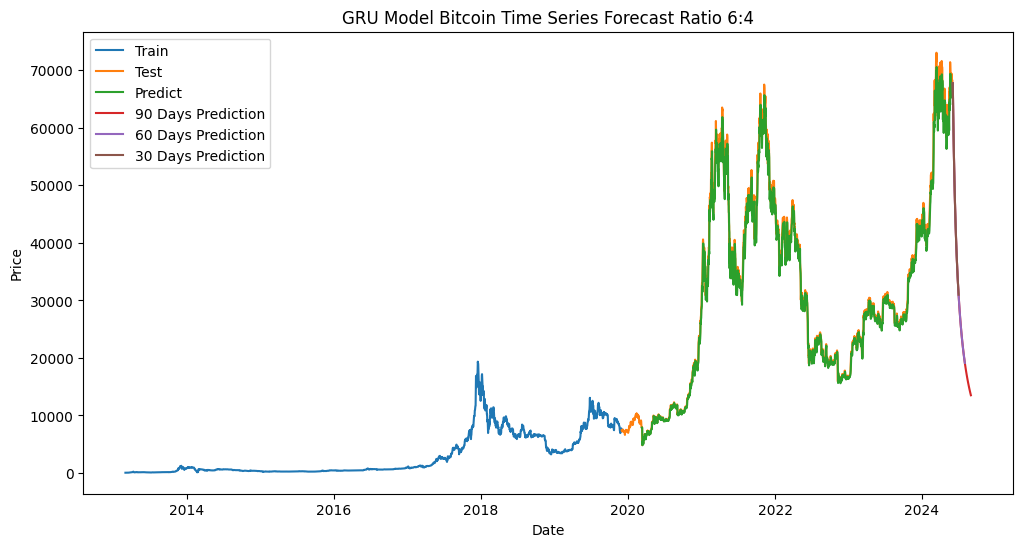

In [13]:
# Drawing
plt.figure(figsize=(12, 6))
dates = pd.to_datetime(data['Date'])

plt.plot(dates[:train_size], scaler.inverse_transform(train_data), label='Train')
plt.plot(dates[train_size:], scaler.inverse_transform(test_data), label='Test')
predicted_test_index_start = train_size + time_step
plt.plot(dates[predicted_test_index_start:predicted_test_index_start + len(y_pred)], y_pred, label='Predict')

last_date = dates.iloc[-1]

future_dates_30 = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=30)
future_30_with_last = np.concatenate((scaler.inverse_transform(test_data[-1].reshape(-1, 1)), pred_30_days), axis=0)
future_dates_60 = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=61)
future_60_with_last = np.concatenate((scaler.inverse_transform(test_data[-1].reshape(-1, 1)), pred_60_days), axis=0)
future_dates_90 = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=91)
future_90_with_last = np.concatenate((scaler.inverse_transform(test_data[-1].reshape(-1, 1)), pred_90_days), axis=0)

# Drawing 90 days
plt.plot(future_dates_90, future_90_with_last[:len(future_dates_90)], label='90 Days Prediction')

# Drawing 60 days
plt.plot(future_dates_60, future_60_with_last[:len(future_dates_60)], label='60 Days Prediction')

# Drawing 30 days
plt.plot(future_dates_30, future_30_with_last[:len(future_dates_30)], label='30 Days Prediction')

plt.legend()
plt.title('GRU Model Bitcoin Time Series Forecast Ratio 6:4')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

In [14]:
# Calculate RMSE, MAE, MAPE for the testing set
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
mape = mean_absolute_percentage_error(y_test, y_pred) * 100
test_mae = np.mean(np.abs(y_pred - y_test))

#Print RMSE, MAE, MAPE
print('Testing RMSE:', test_rmse)
print("Testing MAE:",test_mae)
print("Testing MAPE:", mape)

Testing RMSE: 1572.0705472360623
Testing MAE: 1039.918624514249
Testing MAPE: 2.944587157380902


### RATIO 7:3

In [15]:
# Split the data into training and testing sets 7:3
train_size = int(0.7 * len(data1))
test_size = len(data1) - train_size

train_data = data1[:train_size]
test_data = data1[train_size:]

In [16]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset) - time_step - 1):
        a = dataset[i:(i + time_step), 0]  # i=0, X=0,1,2,3-----99   Y=100
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [17]:
# Reshape into X=t,t+1,t+2..t+99 and Y=t+100
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [18]:
# Reshape input to be [samples, time steps, features] which is required for LSTM
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [19]:
# Define GRU Model
model = Sequential()
model.add(GRU(64, input_shape=(time_step, 1)))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [20]:
# Fit model with data train
model.fit(X_train,y_train,epochs=100,batch_size=64,verbose=1)

Epoch 1/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 5s 71ms/step - loss: 0.0020
Epoch 2/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 3s 68ms/step - loss: 5.7913e-05
Epoch 3/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 3s 66ms/step - loss: 4.4024e-05
Epoch 4/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - loss: 5.0533e-05
Epoch 5/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - loss: 4.1319e-05
Epoch 6/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - loss: 4.1144e-05
Epoch 7/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - loss: 4.0715e-05
Epoch 8/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - loss: 3.4641e-05
Epoch 9/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - loss: 3.7999e-05
Epoch 10/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - loss: 3.0200e-05
Epoch 11/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - loss: 3.8255e-05
Epoch 12/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - loss: 3.0257e-05
Epoch 13/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - loss: 2.9436e-05
Epoch 14/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - loss: 3.4812e-05
Epoch

In [21]:
# Forecast test data
y_pred = model.predict(X_test)

# Normalize y_pred data
y_pred = scaler.inverse_transform(y_pred.reshape(-1, 1))
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step


In [22]:
# Predict the closing prices for the next 30, 60, 90 days
def predict_30_days(model, data, time_step):
    return predict_future(model, data, time_step, 30)

def predict_60_days(model, data, time_step):
    return predict_future(model, data, time_step, 60)

def predict_90_days(model, data, time_step):
    return predict_future(model, data, time_step, 90)

def predict_future(model, data, time_step, future_days):
    x_input = data[-time_step:].reshape(1, -1)
    temp_input = x_input[0].tolist()
    lst_output = []
    i = 0
    while i < future_days:
        if len(temp_input) > time_step:
            x_input = np.array(temp_input[-time_step:])
            x_input = x_input.reshape((1, time_step, 1))
            yhat = model.predict(x_input, verbose=0)
            temp_input.extend(yhat[0].tolist())
            temp_input = temp_input[1:]
            lst_output.extend(yhat.tolist())
            i += 1
        else:
            x_input = np.array(temp_input).reshape((1, time_step, 1))
            yhat = model.predict(x_input, verbose=0)
            temp_input.extend(yhat[0].tolist())
            lst_output.extend(yhat.tolist())
            i += 1
    return lst_output

n_steps = 100

pred_30_days = predict_30_days(model, test_data, n_steps)
pred_60_days = predict_60_days(model, test_data, n_steps)
pred_90_days = predict_90_days(model, test_data, n_steps)

pred_30_days = scaler.inverse_transform(np.array(pred_30_days).reshape(-1, 1))
pred_60_days = scaler.inverse_transform(np.array(pred_60_days).reshape(-1, 1))
pred_90_days = scaler.inverse_transform(np.array(pred_90_days).reshape(-1, 1))

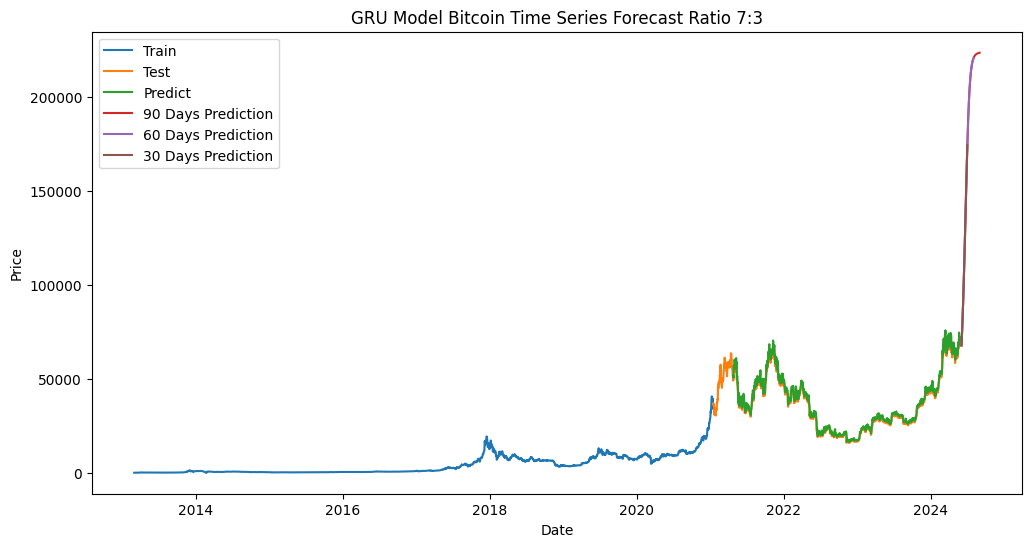

In [23]:
# Drawing
plt.figure(figsize=(12, 6))
dates = pd.to_datetime(data['Date'])

plt.plot(dates[:train_size], scaler.inverse_transform(train_data), label='Train')
plt.plot(dates[train_size:], scaler.inverse_transform(test_data), label='Test')
predicted_test_index_start = train_size + time_step
plt.plot(dates[predicted_test_index_start:predicted_test_index_start + len(y_pred)], y_pred, label='Predict')

last_date = dates.iloc[-1]

future_dates_30 = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=30)
future_30_with_last = np.concatenate((scaler.inverse_transform(test_data[-1].reshape(-1, 1)), pred_30_days), axis=0)
future_dates_60 = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=61)
future_60_with_last = np.concatenate((scaler.inverse_transform(test_data[-1].reshape(-1, 1)), pred_60_days), axis=0)
future_dates_90 = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=91)
future_90_with_last = np.concatenate((scaler.inverse_transform(test_data[-1].reshape(-1, 1)), pred_90_days), axis=0)

# Drawing 90 days
plt.plot(future_dates_90, future_90_with_last[:len(future_dates_90)], label='90 Days Prediction')

# Drawing 60 days
plt.plot(future_dates_60, future_60_with_last[:len(future_dates_60)], label='60 Days Prediction')

# Drawing 30 days
plt.plot(future_dates_30, future_30_with_last[:len(future_dates_30)], label='30 Days Prediction')

plt.legend()
plt.title('GRU Model Bitcoin Time Series Forecast Ratio 7:3')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

In [24]:
# Calculate RMSE, MAE, MAPE for the testing set
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
mape = mean_absolute_percentage_error(y_test, y_pred) * 100
test_mae = np.mean(np.abs(y_pred - y_test))

#Print RMSE, MAE, MAPE
print('Testing RMSE:', test_rmse)
print("Testing MAE:",test_mae)
print("Testing MAPE:", mape)

Testing RMSE: 1876.7462096770855
Testing MAE: 1431.8389551039825
Testing MAPE: 3.945869744373539


### RATIO 8:2

In [25]:
# Split the data into training and testing sets 8:2
train_size = int(0.8 * len(data1))
test_size = len(data1) - train_size

train_data = data1[:train_size]
test_data = data1[train_size:]

In [26]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset) - time_step - 1):
        a = dataset[i:(i + time_step), 0]  # i=0, X=0,1,2,3-----99   Y=100
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [27]:
# Reshape into X=t,t+1,t+2..t+99 and Y=t+100
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [28]:
# Reshape input to be [samples, time steps, features] which is required for LSTM
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [29]:
# Define GRU Model
model = Sequential()
model.add(GRU(64, input_shape=(time_step, 1)))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [30]:
# Fit model with data train
model.fit(X_train,y_train,epochs=100,batch_size=64,verbose=1)

Epoch 1/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 4s 49ms/step - loss: 0.0097
Epoch 2/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - loss: 1.7654e-04
Epoch 3/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - loss: 1.7562e-04
Epoch 4/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 3s 64ms/step - loss: 1.7149e-04
Epoch 5/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - loss: 1.6409e-04
Epoch 6/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - loss: 1.6661e-04
Epoch 7/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 3s 50ms/step - loss: 1.4623e-04
Epoch 8/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - loss: 1.3407e-04
Epoch 9/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 3s 63ms/step - loss: 1.3805e-04
Epoch 10/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - loss: 1.2531e-04
Epoch 11/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - loss: 1.1469e-04
Epoch 12/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 3s 55ms/step - loss: 1.2969e-04
Epoch 13/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 3s 50ms/step - loss: 1.3066e-04
Epoch 14/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - loss: 1.3049e-04
Epoch

In [31]:
# Forecast test data
y_pred = model.predict(X_test)

# Normalize y_pred data
y_pred = scaler.inverse_transform(y_pred.reshape(-1, 1))
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step


In [32]:
# Predict the closing prices for the next 30, 60, 90 days
def predict_30_days(model, data, time_step):
    return predict_future(model, data, time_step, 30)

def predict_60_days(model, data, time_step):
    return predict_future(model, data, time_step, 60)

def predict_90_days(model, data, time_step):
    return predict_future(model, data, time_step, 90)

def predict_future(model, data, time_step, future_days):
    x_input = data[-time_step:].reshape(1, -1)
    temp_input = x_input[0].tolist()
    lst_output = []
    i = 0
    while i < future_days:
        if len(temp_input) > time_step:
            x_input = np.array(temp_input[-time_step:])
            x_input = x_input.reshape((1, time_step, 1))
            yhat = model.predict(x_input, verbose=0)
            temp_input.extend(yhat[0].tolist())
            temp_input = temp_input[1:]
            lst_output.extend(yhat.tolist())
            i += 1
        else:
            x_input = np.array(temp_input).reshape((1, time_step, 1))
            yhat = model.predict(x_input, verbose=0)
            temp_input.extend(yhat[0].tolist())
            lst_output.extend(yhat.tolist())
            i += 1
    return lst_output

n_steps = 100

pred_30_days = predict_30_days(model, test_data, n_steps)
pred_60_days = predict_60_days(model, test_data, n_steps)
pred_90_days = predict_90_days(model, test_data, n_steps)

pred_30_days = scaler.inverse_transform(np.array(pred_30_days).reshape(-1, 1))
pred_60_days = scaler.inverse_transform(np.array(pred_60_days).reshape(-1, 1))
pred_90_days = scaler.inverse_transform(np.array(pred_90_days).reshape(-1, 1))

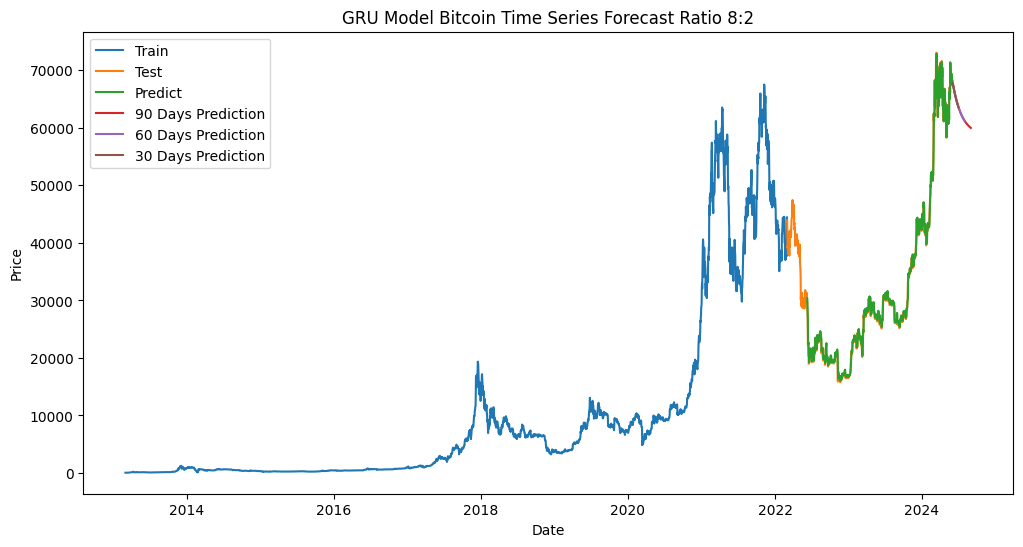

In [33]:
# Drawing
plt.figure(figsize=(12, 6))
dates = pd.to_datetime(data['Date'])

plt.plot(dates[:train_size], scaler.inverse_transform(train_data), label='Train')
plt.plot(dates[train_size:], scaler.inverse_transform(test_data), label='Test')
predicted_test_index_start = train_size + time_step
plt.plot(dates[predicted_test_index_start:predicted_test_index_start + len(y_pred)], y_pred, label='Predict')

last_date = dates.iloc[-1]

future_dates_30 = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=30)
future_30_with_last = np.concatenate((scaler.inverse_transform(test_data[-1].reshape(-1, 1)), pred_30_days), axis=0)
future_dates_60 = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=61)
future_60_with_last = np.concatenate((scaler.inverse_transform(test_data[-1].reshape(-1, 1)), pred_60_days), axis=0)
future_dates_90 = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=91)
future_90_with_last = np.concatenate((scaler.inverse_transform(test_data[-1].reshape(-1, 1)), pred_90_days), axis=0)

# Drawing 90 days
plt.plot(future_dates_90, future_90_with_last[:len(future_dates_90)], label='90 Days Prediction')

# Drawing 60 days
plt.plot(future_dates_60, future_60_with_last[:len(future_dates_60)], label='60 Days Prediction')

# Drawing 30 days
plt.plot(future_dates_30, future_30_with_last[:len(future_dates_30)], label='30 Days Prediction')

plt.legend()
plt.title('GRU Model Bitcoin Time Series Forecast Ratio 8:2')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

In [34]:
# Calculate RMSE, MAE, MAPE for the testing set
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
mape = mean_absolute_percentage_error(y_test, y_pred) * 100
test_mae = np.mean(np.abs(y_pred - y_test))

#Print RMSE, MAE, MAPE
print('Testing RMSE:', test_rmse)
print("Testing MAE:",test_mae)
print("Testing MAPE:", mape)

Testing RMSE: 1042.295834834863
Testing MAE: 661.6629068559557
Testing MAPE: 2.0127152859998785


# DATASET NASDAQ

In [35]:
# Read data from the CSV file
data = pd.read_csv('NASDAQ Composite Historical Data.csv')
data = data.dropna()

data['Date'] = pd.to_datetime(data['Date'], format='%m/%d/%Y')
# Format column "Price", "Open", "High", "Low"
for col in ['Price', 'Open', 'High', 'Low']:
    data[col] = data[col].str.replace(',', '').astype(float)
data = data.sort_index(ascending=False)
data = data.reset_index(drop=True)

data

,Date,Price,Open,High,Low,Vol.,Change %
0,2013-03-01,3169.74,3143.54,3171.50,3129.40,431.39M,0.30%
1,2013-03-04,3182.03,3159.46,3182.27,3154.79,397.77M,0.39%
2,2013-03-05,3224.13,3200.38,3227.31,3200.27,418.69M,1.32%
3,2013-03-06,3222.37,3233.31,3233.44,3217.67,377.54M,-0.05%
4,2013-03-07,3232.09,3224.50,3235.10,3221.47,365.78M,0.30%
...,...,...,...,...,...,...,...
2828,2024-05-24,16920.79,16786.79,16947.79,16771.58,953.61M,1.10%
2829,2024-05-28,17019.88,16988.31,17032.65,16917.51,1.10B,0.59%
2830,2024-05-29,16920.58,16879.35,16989.60,16873.97,1.15B,-0.58%
2831,2024-05-30,16737.08,16878.63,16900.46,16690.36,1.11B,-1.08%


In [36]:
data1 = data.reset_index()['Price']
data1

0        3169.74
1        3182.03
2        3224.13
3        3222.37
4        3232.09
          ...   
2828    16920.79
2829    17019.88
2830    16920.58
2831    16737.08
2832    16735.02
Name: Price, Length: 2833, dtype: float64

In [37]:
#Scaler data
scaler = MinMaxScaler(feature_range=(0, 1))
data1 = scaler.fit_transform(np.array(data1).reshape(-1, 1))
data1

array([[2.43981313e-04],
       [1.13112047e-03],
       [4.17005931e-03],
       ...,
       [9.92832147e-01],
       [9.79586416e-01],
       [9.79437717e-01]])

### RATIO 6:4

In [38]:
# Split the data into training and testing sets 6:4
train_size = int(0.6 * len(data1))
test_size = len(data1) - train_size

train_data = data1[:train_size]
test_data = data1[train_size:]

In [39]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset) - time_step - 1):
        a = dataset[i:(i + time_step), 0]  # i=0, X=0,1,2,3-----99   Y=100
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [40]:
# Reshape into X=t,t+1,t+2..t+99 and Y=t+100
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [41]:
# Reshape input to be [samples, time steps, features] which is required for LSTM
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [42]:
# Define GRU Model
model = Sequential()
model.add(GRU(64, input_shape=(time_step, 1)))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [43]:
# Fit model with data train
model.fit(X_train,y_train,epochs=100,batch_size=64,verbose=1)

Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - loss: 0.0118
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - loss: 0.0013
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - loss: 1.5604e-04
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - loss: 3.9764e-05
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - loss: 3.4435e-05
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 60ms/step - loss: 3.3863e-05
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - loss: 3.2011e-05
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - loss: 3.4510e-05
Epoch 9/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - loss: 3.3633e-05
Epoch 10/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - loss: 3.3729e-05
Epoch 11/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 64ms/step - loss: 3.0776e-05
Epoch 12/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - loss: 3.4247e-05
Epoch 13/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - loss: 2.9566e-05
Epoch 14/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - loss: 3.5697e-05
Epoch 15/

In [44]:
# Forecast test data
y_pred = model.predict(X_test)

# Normalize y_pred data
y_pred = scaler.inverse_transform(y_pred.reshape(-1, 1))
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step


In [45]:
# Predict the closing prices for the next 30, 60, 90 days
def predict_30_days(model, data, time_step):
    return predict_future(model, data, time_step, 30)

def predict_60_days(model, data, time_step):
    return predict_future(model, data, time_step, 60)

def predict_90_days(model, data, time_step):
    return predict_future(model, data, time_step, 90)

def predict_future(model, data, time_step, future_days):
    x_input = data[-time_step:].reshape(1, -1)
    temp_input = x_input[0].tolist()
    lst_output = []
    i = 0
    while i < future_days:
        if len(temp_input) > time_step:
            x_input = np.array(temp_input[-time_step:])
            x_input = x_input.reshape((1, time_step, 1))
            yhat = model.predict(x_input, verbose=0)
            temp_input.extend(yhat[0].tolist())
            temp_input = temp_input[1:]
            lst_output.extend(yhat.tolist())
            i += 1
        else:
            x_input = np.array(temp_input).reshape((1, time_step, 1))
            yhat = model.predict(x_input, verbose=0)
            temp_input.extend(yhat[0].tolist())
            lst_output.extend(yhat.tolist())
            i += 1
    return lst_output

n_steps = 100

pred_30_days = predict_30_days(model, test_data, n_steps)
pred_60_days = predict_60_days(model, test_data, n_steps)
pred_90_days = predict_90_days(model, test_data, n_steps)

pred_30_days = scaler.inverse_transform(np.array(pred_30_days).reshape(-1, 1))
pred_60_days = scaler.inverse_transform(np.array(pred_60_days).reshape(-1, 1))
pred_90_days = scaler.inverse_transform(np.array(pred_90_days).reshape(-1, 1))

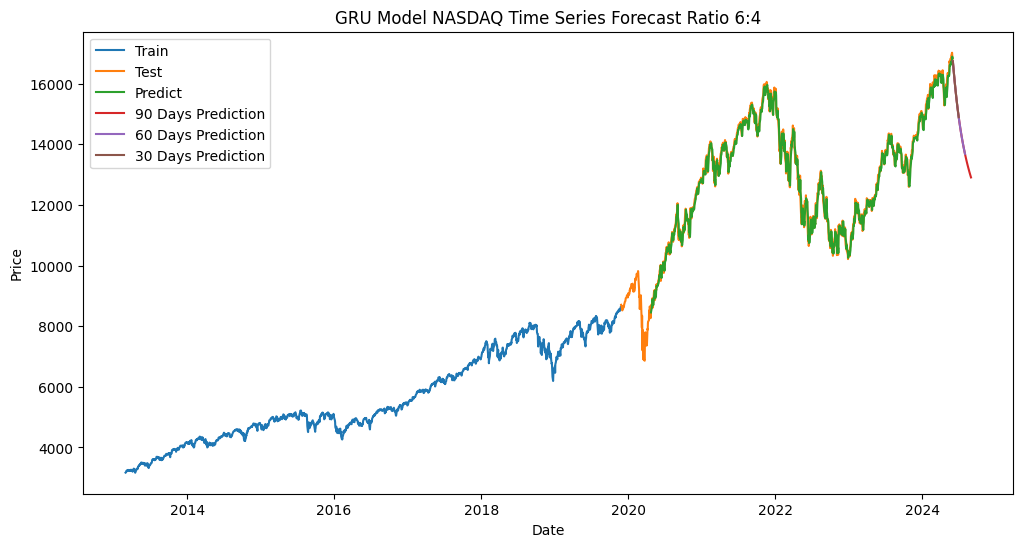

In [46]:
# Drawing
plt.figure(figsize=(12, 6))
dates = pd.to_datetime(data['Date'])

plt.plot(dates[:train_size], scaler.inverse_transform(train_data), label='Train')
plt.plot(dates[train_size:], scaler.inverse_transform(test_data), label='Test')
predicted_test_index_start = train_size + time_step
plt.plot(dates[predicted_test_index_start:predicted_test_index_start + len(y_pred)], y_pred, label='Predict')

last_date = dates.iloc[-1]

future_dates_30 = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=30)
future_30_with_last = np.concatenate((scaler.inverse_transform(test_data[-1].reshape(-1, 1)), pred_30_days), axis=0)
future_dates_60 = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=61)
future_60_with_last = np.concatenate((scaler.inverse_transform(test_data[-1].reshape(-1, 1)), pred_60_days), axis=0)
future_dates_90 = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=91)
future_90_with_last = np.concatenate((scaler.inverse_transform(test_data[-1].reshape(-1, 1)), pred_90_days), axis=0)

# Drawing 90 days
plt.plot(future_dates_90, future_90_with_last[:len(future_dates_90)], label='90 Days Prediction')

# Drawing 60 days
plt.plot(future_dates_60, future_60_with_last[:len(future_dates_60)], label='60 Days Prediction')

# Drawing 30 days
plt.plot(future_dates_30, future_30_with_last[:len(future_dates_30)], label='30 Days Prediction')

plt.legend()
plt.title('GRU Model NASDAQ Time Series Forecast Ratio 6:4')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

In [47]:
# Calculate RMSE, MAE, MAPE for the testing set
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
mape = mean_absolute_percentage_error(y_test, y_pred) * 100
test_mae = np.mean(np.abs(y_pred - y_test))

#Print RMSE, MAE, MAPE
print('Testing RMSE:', test_rmse)
print("Testing MAE:",test_mae)
print("Testing MAPE:", mape)

Testing RMSE: 190.6649036482911
Testing MAE: 151.4808759378025
Testing MAPE: 1.182230411897057


### RATIO 7:3

In [48]:
# Split the data into training and testing sets 7:3
train_size = int(0.7 * len(data1))
test_size = len(data1) - train_size

train_data = data1[:train_size]
test_data = data1[train_size:]

In [49]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset) - time_step - 1):
        a = dataset[i:(i + time_step), 0]  # i=0, X=0,1,2,3-----99   Y=100
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [50]:
# Reshape into X=t,t+1,t+2..t+99 and Y=t+100
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [51]:
# Reshape input to be [samples, time steps, features] which is required for LSTM
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [52]:
# Define GRU Model
model = Sequential()
model.add(GRU(64, input_shape=(time_step, 1)))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [53]:
# Fit model with data train
model.fit(X_train,y_train,epochs=100,batch_size=64,verbose=1)

Epoch 1/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 70ms/step - loss: 0.0320
Epoch 2/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 76ms/step - loss: 0.0025
Epoch 3/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 65ms/step - loss: 1.3145e-04
Epoch 4/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 69ms/step - loss: 8.8813e-05
Epoch 5/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 68ms/step - loss: 6.9926e-05
Epoch 6/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 60ms/step - loss: 9.0385e-05
Epoch 7/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - loss: 7.6303e-05
Epoch 8/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - loss: 7.7802e-05
Epoch 9/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - loss: 7.2765e-05
Epoch 10/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - loss: 7.0020e-05
Epoch 11/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - loss: 6.3651e-05
Epoch 12/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - loss: 6.5588e-05
Epoch 13/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - loss: 6.9297e-05
Epoch 14/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 59ms/step - loss: 6.5073e-05
Epoch 15/

In [54]:
# Forecast test data
y_pred = model.predict(X_test)

# Normalize y_pred data
y_pred = scaler.inverse_transform(y_pred.reshape(-1, 1))
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step


In [55]:
# Predict the closing prices for the next 30, 60, 90 days
def predict_30_days(model, data, time_step):
    return predict_future(model, data, time_step, 30)

def predict_60_days(model, data, time_step):
    return predict_future(model, data, time_step, 60)

def predict_90_days(model, data, time_step):
    return predict_future(model, data, time_step, 90)

def predict_future(model, data, time_step, future_days):
    x_input = data[-time_step:].reshape(1, -1)
    temp_input = x_input[0].tolist()
    lst_output = []
    i = 0
    while i < future_days:
        if len(temp_input) > time_step:
            x_input = np.array(temp_input[-time_step:])
            x_input = x_input.reshape((1, time_step, 1))
            yhat = model.predict(x_input, verbose=0)
            temp_input.extend(yhat[0].tolist())
            temp_input = temp_input[1:]
            lst_output.extend(yhat.tolist())
            i += 1
        else:
            x_input = np.array(temp_input).reshape((1, time_step, 1))
            yhat = model.predict(x_input, verbose=0)
            temp_input.extend(yhat[0].tolist())
            lst_output.extend(yhat.tolist())
            i += 1
    return lst_output

n_steps = 100

pred_30_days = predict_30_days(model, test_data, n_steps)
pred_60_days = predict_60_days(model, test_data, n_steps)
pred_90_days = predict_90_days(model, test_data, n_steps)

pred_30_days = scaler.inverse_transform(np.array(pred_30_days).reshape(-1, 1))
pred_60_days = scaler.inverse_transform(np.array(pred_60_days).reshape(-1, 1))
pred_90_days = scaler.inverse_transform(np.array(pred_90_days).reshape(-1, 1))

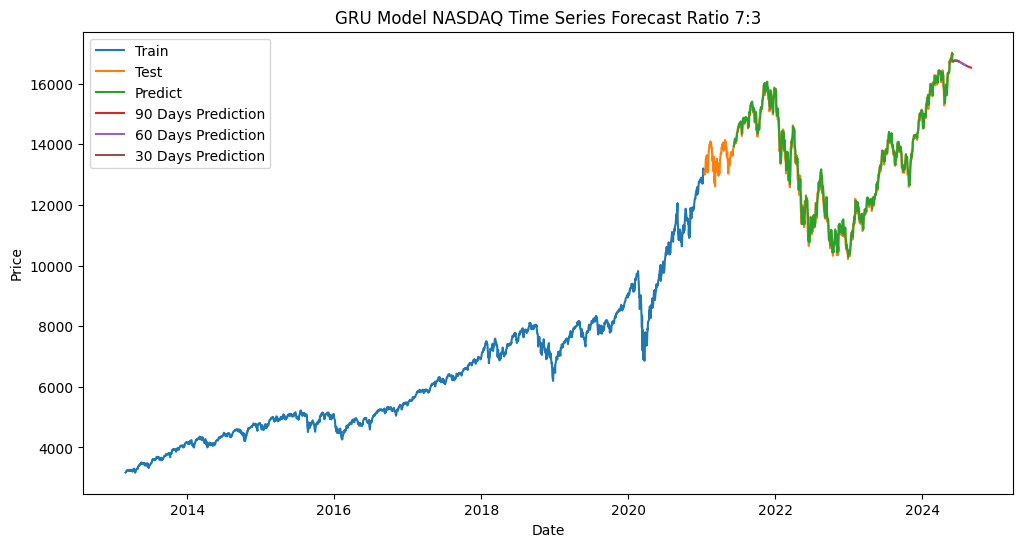

In [56]:
# Drawing
plt.figure(figsize=(12, 6))
dates = pd.to_datetime(data['Date'])

plt.plot(dates[:train_size], scaler.inverse_transform(train_data), label='Train')
plt.plot(dates[train_size:], scaler.inverse_transform(test_data), label='Test')
predicted_test_index_start = train_size + time_step
plt.plot(dates[predicted_test_index_start:predicted_test_index_start + len(y_pred)], y_pred, label='Predict')

last_date = dates.iloc[-1]

future_dates_30 = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=30)
future_30_with_last = np.concatenate((scaler.inverse_transform(test_data[-1].reshape(-1, 1)), pred_30_days), axis=0)
future_dates_60 = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=61)
future_60_with_last = np.concatenate((scaler.inverse_transform(test_data[-1].reshape(-1, 1)), pred_60_days), axis=0)
future_dates_90 = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=91)
future_90_with_last = np.concatenate((scaler.inverse_transform(test_data[-1].reshape(-1, 1)), pred_90_days), axis=0)

# Drawing 90 days
plt.plot(future_dates_90, future_90_with_last[:len(future_dates_90)], label='90 Days Prediction')

# Drawing 60 days
plt.plot(future_dates_60, future_60_with_last[:len(future_dates_60)], label='60 Days Prediction')

# Drawing 30 days
plt.plot(future_dates_30, future_30_with_last[:len(future_dates_30)], label='30 Days Prediction')

plt.legend()
plt.title('GRU Model NASDAQ Time Series Forecast Ratio 7:3')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

In [57]:
# Calculate RMSE, MAE, MAPE for the testing set
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
mape = mean_absolute_percentage_error(y_test, y_pred) * 100
test_mae = np.mean(np.abs(y_pred - y_test))

#Print RMSE, MAE, MAPE
print('Testing RMSE:', test_rmse)
print("Testing MAE:",test_mae)
print("Testing MAPE:", mape)

Testing RMSE: 196.34138091633469
Testing MAE: 153.22211109604473
Testing MAPE: 1.1743615517287709


### RATIO 8:2

In [58]:
# Split the data into training and testing sets 8:2
train_size = int(0.8 * len(data1))
test_size = len(data1) - train_size

train_data = data1[:train_size]
test_data = data1[train_size:]

In [59]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset) - time_step - 1):
        a = dataset[i:(i + time_step), 0]  # i=0, X=0,1,2,3-----99   Y=100
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [60]:
# Reshape into X=t,t+1,t+2..t+99 and Y=t+100
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [61]:
# Reshape input to be [samples, time steps, features] which is required for LSTM
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [62]:
# Define GRU Model
model = Sequential()
model.add(GRU(64, input_shape=(time_step, 1)))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [63]:
# Fit model with data train
model.fit(X_train,y_train,epochs=100,batch_size=64,verbose=1)

Epoch 1/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 9s 101ms/step - loss: 0.0565
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 3s 89ms/step - loss: 0.0018
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 3s 86ms/step - loss: 1.5588e-04
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 6s 104ms/step - loss: 1.1487e-04
Epoch 5/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 3s 96ms/step - loss: 1.0823e-04
Epoch 6/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 3s 93ms/step - loss: 1.1062e-04
Epoch 7/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 4s 103ms/step - loss: 1.2203e-04
Epoch 8/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 4s 107ms/step - loss: 1.0774e-04
Epoch 9/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 3s 98ms/step - loss: 1.0533e-04
Epoch 10/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 4s 109ms/step - loss: 8.3368e-05
Epoch 11/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 3s 97ms/step - loss: 1.0017e-04
Epoch 12/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 3s 91ms/step - loss: 8.8400e-05
Epoch 13/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 3s 85ms/step - loss: 9.8452e-05
Epoch 14/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 3s 94ms/step - loss: 8.3528e-05
Epoc

In [64]:
# Forecast test data
y_pred = model.predict(X_test)

# Normalize y_pred data
y_pred = scaler.inverse_transform(y_pred.reshape(-1, 1))
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step


In [65]:
# Predict the closing prices for the next 30, 60, 90 days
def predict_30_days(model, data, time_step):
    return predict_future(model, data, time_step, 30)

def predict_60_days(model, data, time_step):
    return predict_future(model, data, time_step, 60)

def predict_90_days(model, data, time_step):
    return predict_future(model, data, time_step, 90)

def predict_future(model, data, time_step, future_days):
    x_input = data[-time_step:].reshape(1, -1)
    temp_input = x_input[0].tolist()
    lst_output = []
    i = 0
    while i < future_days:
        if len(temp_input) > time_step:
            x_input = np.array(temp_input[-time_step:])
            x_input = x_input.reshape((1, time_step, 1))
            yhat = model.predict(x_input, verbose=0)
            temp_input.extend(yhat[0].tolist())
            temp_input = temp_input[1:]
            lst_output.extend(yhat.tolist())
            i += 1
        else:
            x_input = np.array(temp_input).reshape((1, time_step, 1))
            yhat = model.predict(x_input, verbose=0)
            temp_input.extend(yhat[0].tolist())
            lst_output.extend(yhat.tolist())
            i += 1
    return lst_output

n_steps = 100

pred_30_days = predict_30_days(model, test_data, n_steps)
pred_60_days = predict_60_days(model, test_data, n_steps)
pred_90_days = predict_90_days(model, test_data, n_steps)

pred_30_days = scaler.inverse_transform(np.array(pred_30_days).reshape(-1, 1))
pred_60_days = scaler.inverse_transform(np.array(pred_60_days).reshape(-1, 1))
pred_90_days = scaler.inverse_transform(np.array(pred_90_days).reshape(-1, 1))

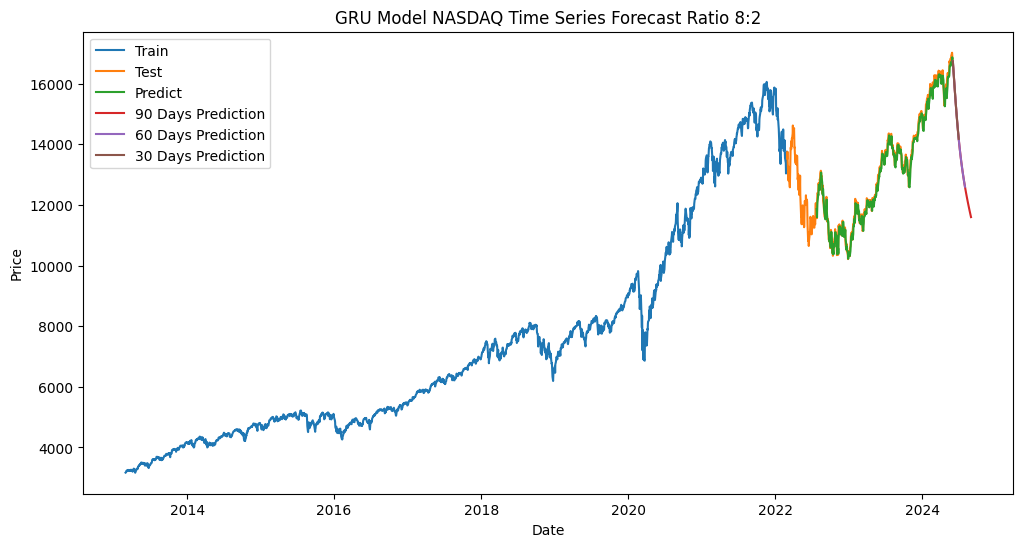

In [66]:
# Drawing
plt.figure(figsize=(12, 6))
dates = pd.to_datetime(data['Date'])

plt.plot(dates[:train_size], scaler.inverse_transform(train_data), label='Train')
plt.plot(dates[train_size:], scaler.inverse_transform(test_data), label='Test')
predicted_test_index_start = train_size + time_step
plt.plot(dates[predicted_test_index_start:predicted_test_index_start + len(y_pred)], y_pred, label='Predict')

last_date = dates.iloc[-1]

future_dates_30 = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=30)
future_30_with_last = np.concatenate((scaler.inverse_transform(test_data[-1].reshape(-1, 1)), pred_30_days), axis=0)
future_dates_60 = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=61)
future_60_with_last = np.concatenate((scaler.inverse_transform(test_data[-1].reshape(-1, 1)), pred_60_days), axis=0)
future_dates_90 = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=91)
future_90_with_last = np.concatenate((scaler.inverse_transform(test_data[-1].reshape(-1, 1)), pred_90_days), axis=0)

# Drawing 90 days
plt.plot(future_dates_90, future_90_with_last[:len(future_dates_90)], label='90 Days Prediction')

# Drawing 60 days
plt.plot(future_dates_60, future_60_with_last[:len(future_dates_60)], label='60 Days Prediction')

# Drawing 30 days
plt.plot(future_dates_30, future_30_with_last[:len(future_dates_30)], label='30 Days Prediction')

plt.legend()
plt.title('GRU Model NASDAQ Time Series Forecast Ratio 8:2')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

In [67]:
# Calculate RMSE, MAE, MAPE for the testing set
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
mape = mean_absolute_percentage_error(y_test, y_pred) * 100
test_mae = np.mean(np.abs(y_pred - y_test))

#Print RMSE, MAE, MAPE
print('Testing RMSE:', test_rmse)
print("Testing MAE:",test_mae)
print("Testing MAPE:", mape)

Testing RMSE: 185.97459232618638
Testing MAE: 150.57219890021466
Testing MAPE: 1.157679607562565


# DATASET USD

In [68]:
# Read data from the CSV file
data = pd.read_csv('US Dollar Index Futures Historical Data.csv')
data = data.dropna()

data['Date'] = pd.to_datetime(data['Date'], format='%m/%d/%Y')
data = data.sort_index(ascending=False)
data = data.reset_index(drop=True)

data

,Date,Price,Open,High,Low,Vol.,Change %
0,2013-03-01,82.358,82.010,82.580,81.850,34.83K,0.43%
1,2013-03-04,82.255,82.355,82.530,82.230,19.76K,-0.13%
2,2013-03-05,82.147,82.210,82.300,81.955,25.02K,-0.13%
3,2013-03-06,82.507,82.020,82.640,81.975,26.04K,0.44%
4,2013-03-07,82.123,82.615,82.620,81.995,35.17K,-0.47%
...,...,...,...,...,...,...,...
2902,2024-05-27,104.638,104.645,104.670,104.485,3.09K,0.00%
2903,2024-05-28,104.539,104.490,104.560,104.260,11.02K,-0.09%
2904,2024-05-29,105.034,104.590,105.085,104.515,17.66K,0.47%
2905,2024-05-30,104.658,105.095,105.135,104.575,17.83K,-0.36%


In [69]:
data1 = data.reset_index()['Price']
data1

0        82.358
1        82.255
2        82.147
3        82.507
4        82.123
         ...   
2902    104.638
2903    104.539
2904    105.034
2905    104.658
2906    104.627
Name: Price, Length: 2907, dtype: float64

In [70]:
#Scaler data
scaler = MinMaxScaler(feature_range=(0, 1))
data1 = scaler.fit_transform(np.array(data1).reshape(-1, 1))
data1

array([[0.09255176],
       [0.08960225],
       [0.08650955],
       ...,
       [0.74190315],
       [0.73113599],
       [0.73024827]])

### RATIO 6:4

In [71]:
# Split the data into training and testing sets 6:4
train_size = int(0.6 * len(data1))
test_size = len(data1) - train_size

train_data = data1[:train_size]
test_data = data1[train_size:]

In [72]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset) - time_step - 1):
        a = dataset[i:(i + time_step), 0]  # i=0, X=0,1,2,3-----99   Y=100
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [73]:
# Reshape into X=t,t+1,t+2..t+99 and Y=t+100
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [74]:
# Reshape input to be [samples, time steps, features] which is required for LSTM
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [75]:
# Define GRU Model
model = Sequential()
model.add(GRU(64, input_shape=(time_step, 1)))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [76]:
# Fit model with data train
model.fit(X_train,y_train,epochs=100,batch_size=64,verbose=1)

Epoch 1/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 4s 68ms/step - loss: 0.0737
Epoch 2/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 74ms/step - loss: 0.0049
Epoch 3/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 71ms/step - loss: 0.0016
Epoch 4/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 3s 107ms/step - loss: 4.3909e-04
Epoch 5/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 80ms/step - loss: 2.8548e-04
Epoch 6/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 68ms/step - loss: 2.6350e-04
Epoch 7/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 91ms/step - loss: 2.7784e-04
Epoch 8/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 94ms/step - loss: 2.5163e-04
Epoch 9/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 74ms/step - loss: 2.4024e-04
Epoch 10/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 66ms/step - loss: 2.3333e-04
Epoch 11/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 63ms/step - loss: 2.2515e-04
Epoch 12/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 73ms/step - loss: 2.1655e-04
Epoch 13/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 67ms/step - loss: 2.0754e-04
Epoch 14/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 62ms/step - loss: 2.0913e-04
Epoch 15/100

In [77]:
# Forecast test data
y_pred = model.predict(X_test)

# Normalize y_pred data
y_pred = scaler.inverse_transform(y_pred.reshape(-1, 1))
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step


In [78]:
# Predict the closing prices for the next 30, 60, 90 days
def predict_30_days(model, data, time_step):
    return predict_future(model, data, time_step, 30)

def predict_60_days(model, data, time_step):
    return predict_future(model, data, time_step, 60)

def predict_90_days(model, data, time_step):
    return predict_future(model, data, time_step, 90)

def predict_future(model, data, time_step, future_days):
    x_input = data[-time_step:].reshape(1, -1)
    temp_input = x_input[0].tolist()
    lst_output = []
    i = 0
    while i < future_days:
        if len(temp_input) > time_step:
            x_input = np.array(temp_input[-time_step:])
            x_input = x_input.reshape((1, time_step, 1))
            yhat = model.predict(x_input, verbose=0)
            temp_input.extend(yhat[0].tolist())
            temp_input = temp_input[1:]
            lst_output.extend(yhat.tolist())
            i += 1
        else:
            x_input = np.array(temp_input).reshape((1, time_step, 1))
            yhat = model.predict(x_input, verbose=0)
            temp_input.extend(yhat[0].tolist())
            lst_output.extend(yhat.tolist())
            i += 1
    return lst_output

n_steps = 100

pred_30_days = predict_30_days(model, test_data, n_steps)
pred_60_days = predict_60_days(model, test_data, n_steps)
pred_90_days = predict_90_days(model, test_data, n_steps)

pred_30_days = scaler.inverse_transform(np.array(pred_30_days).reshape(-1, 1))
pred_60_days = scaler.inverse_transform(np.array(pred_60_days).reshape(-1, 1))
pred_90_days = scaler.inverse_transform(np.array(pred_90_days).reshape(-1, 1))

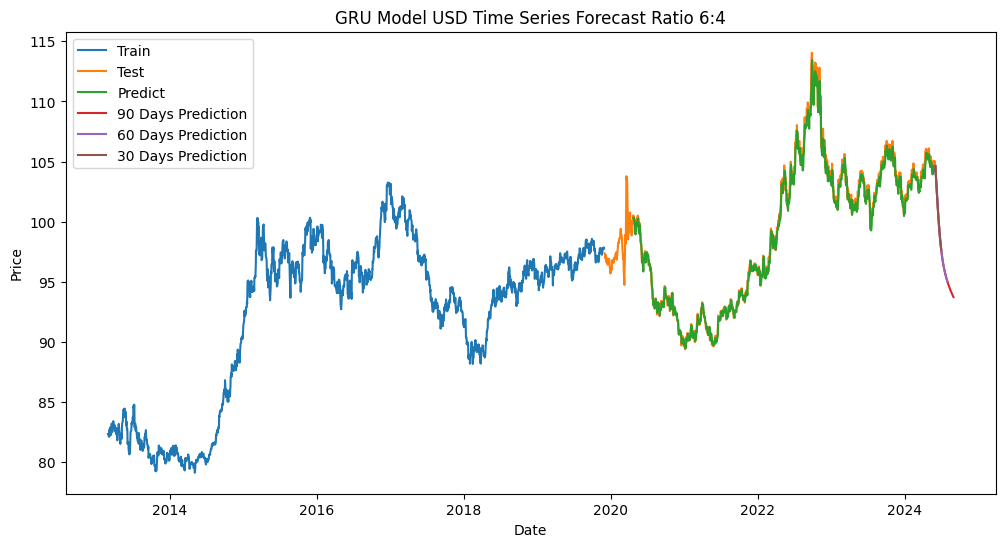

In [79]:
# Drawing
plt.figure(figsize=(12, 6))
dates = pd.to_datetime(data['Date'])

plt.plot(dates[:train_size], scaler.inverse_transform(train_data), label='Train')
plt.plot(dates[train_size:], scaler.inverse_transform(test_data), label='Test')
predicted_test_index_start = train_size + time_step
plt.plot(dates[predicted_test_index_start:predicted_test_index_start + len(y_pred)], y_pred, label='Predict')

last_date = dates.iloc[-1]

future_dates_30 = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=30)
future_30_with_last = np.concatenate((scaler.inverse_transform(test_data[-1].reshape(-1, 1)), pred_30_days), axis=0)
future_dates_60 = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=61)
future_60_with_last = np.concatenate((scaler.inverse_transform(test_data[-1].reshape(-1, 1)), pred_60_days), axis=0)
future_dates_90 = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=91)
future_90_with_last = np.concatenate((scaler.inverse_transform(test_data[-1].reshape(-1, 1)), pred_90_days), axis=0)

# Drawing 90 days
plt.plot(future_dates_90, future_90_with_last[:len(future_dates_90)], label='90 Days Prediction')

# Drawing 60 days
plt.plot(future_dates_60, future_60_with_last[:len(future_dates_60)], label='60 Days Prediction')

# Drawing 30 days
plt.plot(future_dates_30, future_30_with_last[:len(future_dates_30)], label='30 Days Prediction')

plt.legend()
plt.title('GRU Model USD Time Series Forecast Ratio 6:4')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

In [80]:
# Calculate RMSE, MAE, MAPE for the testing set
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
mape = mean_absolute_percentage_error(y_test, y_pred) * 100
test_mae = np.mean(np.abs(y_pred - y_test))

#Print RMSE, MAE, MAPE
print('Testing RMSE:', test_rmse)
print("Testing MAE:",test_mae)
print("Testing MAPE:", mape)

Testing RMSE: 0.5287938988581208
Testing MAE: 0.3983220836689693
Testing MAPE: 0.3932097001794979


### RATIO 7:3

In [81]:
# Split the data into training and testing sets 7:3
train_size = int(0.7 * len(data1))
test_size = len(data1) - train_size

train_data = data1[:train_size]
test_data = data1[train_size:]

In [82]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset) - time_step - 1):
        a = dataset[i:(i + time_step), 0]  # i=0, X=0,1,2,3-----99   Y=100
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [83]:
# Reshape into X=t,t+1,t+2..t+99 and Y=t+100
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [84]:
# Reshape input to be [samples, time steps, features] which is required for LSTM
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [85]:
# Define GRU Model
model = Sequential()
model.add(GRU(64, input_shape=(time_step, 1)))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [86]:
# Fit model with data train
model.fit(X_train,y_train,epochs=100,batch_size=64,verbose=1)

Epoch 1/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 3s 58ms/step - loss: 0.0579
Epoch 2/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 64ms/step - loss: 0.0038
Epoch 3/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 62ms/step - loss: 0.0010
Epoch 4/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 60ms/step - loss: 3.5776e-04
Epoch 5/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - loss: 2.9667e-04
Epoch 6/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 60ms/step - loss: 2.9735e-04
Epoch 7/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 67ms/step - loss: 2.7315e-04
Epoch 8/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 69ms/step - loss: 2.5933e-04
Epoch 9/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 3s 85ms/step - loss: 2.5345e-04
Epoch 10/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 76ms/step - loss: 2.5397e-04
Epoch 11/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 60ms/step - loss: 2.6709e-04
Epoch 12/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 60ms/step - loss: 2.3604e-04
Epoch 13/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 63ms/step - loss: 2.3883e-04
Epoch 14/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 62ms/step - loss: 2.1806e-04
Epoch 15/100


In [87]:
# Forecast test data
y_pred = model.predict(X_test)

# Normalize y_pred data
y_pred = scaler.inverse_transform(y_pred.reshape(-1, 1))
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step


In [88]:
# Predict the closing prices for the next 30, 60, 90 days
def predict_30_days(model, data, time_step):
    return predict_future(model, data, time_step, 30)

def predict_60_days(model, data, time_step):
    return predict_future(model, data, time_step, 60)

def predict_90_days(model, data, time_step):
    return predict_future(model, data, time_step, 90)

def predict_future(model, data, time_step, future_days):
    x_input = data[-time_step:].reshape(1, -1)
    temp_input = x_input[0].tolist()
    lst_output = []
    i = 0
    while i < future_days:
        if len(temp_input) > time_step:
            x_input = np.array(temp_input[-time_step:])
            x_input = x_input.reshape((1, time_step, 1))
            yhat = model.predict(x_input, verbose=0)
            temp_input.extend(yhat[0].tolist())
            temp_input = temp_input[1:]
            lst_output.extend(yhat.tolist())
            i += 1
        else:
            x_input = np.array(temp_input).reshape((1, time_step, 1))
            yhat = model.predict(x_input, verbose=0)
            temp_input.extend(yhat[0].tolist())
            lst_output.extend(yhat.tolist())
            i += 1
    return lst_output

n_steps = 100

pred_30_days = predict_30_days(model, test_data, n_steps)
pred_60_days = predict_60_days(model, test_data, n_steps)
pred_90_days = predict_90_days(model, test_data, n_steps)

pred_30_days = scaler.inverse_transform(np.array(pred_30_days).reshape(-1, 1))
pred_60_days = scaler.inverse_transform(np.array(pred_60_days).reshape(-1, 1))
pred_90_days = scaler.inverse_transform(np.array(pred_90_days).reshape(-1, 1))

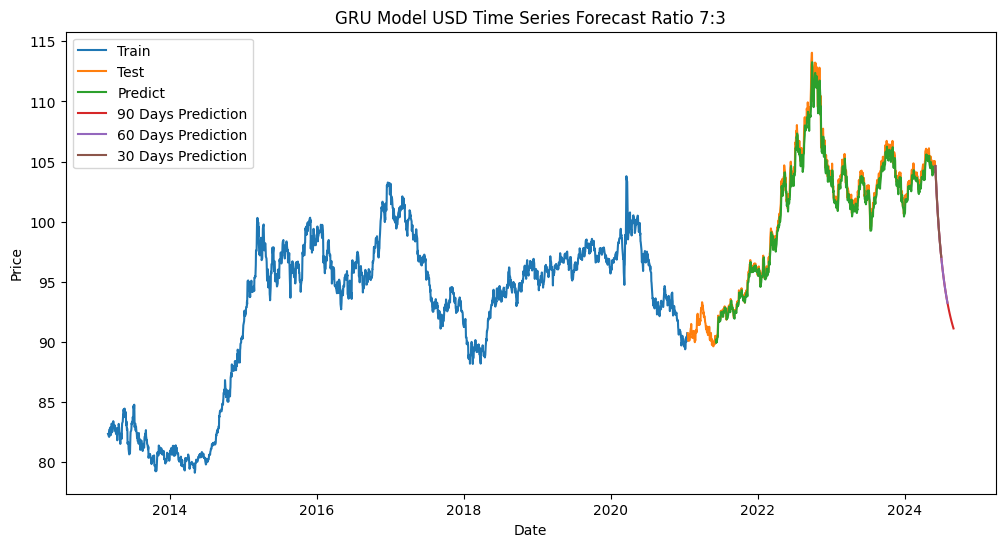

In [89]:
# Drawing
plt.figure(figsize=(12, 6))
dates = pd.to_datetime(data['Date'])

plt.plot(dates[:train_size], scaler.inverse_transform(train_data), label='Train')
plt.plot(dates[train_size:], scaler.inverse_transform(test_data), label='Test')
predicted_test_index_start = train_size + time_step
plt.plot(dates[predicted_test_index_start:predicted_test_index_start + len(y_pred)], y_pred, label='Predict')

last_date = dates.iloc[-1]

future_dates_30 = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=30)
future_30_with_last = np.concatenate((scaler.inverse_transform(test_data[-1].reshape(-1, 1)), pred_30_days), axis=0)
future_dates_60 = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=61)
future_60_with_last = np.concatenate((scaler.inverse_transform(test_data[-1].reshape(-1, 1)), pred_60_days), axis=0)
future_dates_90 = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=91)
future_90_with_last = np.concatenate((scaler.inverse_transform(test_data[-1].reshape(-1, 1)), pred_90_days), axis=0)

# Drawing 90 days
plt.plot(future_dates_90, future_90_with_last[:len(future_dates_90)], label='90 Days Prediction')

# Drawing 60 days
plt.plot(future_dates_60, future_60_with_last[:len(future_dates_60)], label='60 Days Prediction')

# Drawing 30 days
plt.plot(future_dates_30, future_30_with_last[:len(future_dates_30)], label='30 Days Prediction')

plt.legend()
plt.title('GRU Model USD Time Series Forecast Ratio 7:3')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

In [90]:
# Calculate RMSE, MAE, MAPE for the testing set
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
mape = mean_absolute_percentage_error(y_test, y_pred) * 100
test_mae = np.mean(np.abs(y_pred - y_test))

#Print RMSE, MAE, MAPE
print('Testing RMSE:', test_rmse)
print("Testing MAE:",test_mae)
print("Testing MAPE:", mape)

Testing RMSE: 0.630103058727956
Testing MAE: 0.49406307461595306
Testing MAPE: 0.4784742218590925


### RATIO 8:2

In [91]:
# Split the data into training and testing sets 8:2
train_size = int(0.8 * len(data1))
test_size = len(data1) - train_size

train_data = data1[:train_size]
test_data = data1[train_size:]

In [92]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset) - time_step - 1):
        a = dataset[i:(i + time_step), 0]  # i=0, X=0,1,2,3-----99   Y=100
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [93]:
# Reshape into X=t,t+1,t+2..t+99 and Y=t+100
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [94]:
# Reshape input to be [samples, time steps, features] which is required for LSTM
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [95]:
# Define GRU Model
model = Sequential()
model.add(GRU(64, input_shape=(time_step, 1)))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [96]:
# Fit model with data train
model.fit(X_train,y_train,epochs=100,batch_size=64,verbose=1)

Epoch 1/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 4s 58ms/step - loss: 0.0564
Epoch 2/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 63ms/step - loss: 0.0034
Epoch 3/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 69ms/step - loss: 0.0011
Epoch 4/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 60ms/step - loss: 3.0494e-04
Epoch 5/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 3s 71ms/step - loss: 2.4586e-04
Epoch 6/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 3s 77ms/step - loss: 2.4668e-04
Epoch 7/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 3s 74ms/step - loss: 2.4989e-04
Epoch 8/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 66ms/step - loss: 2.3327e-04
Epoch 9/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 69ms/step - loss: 1.9196e-04
Epoch 10/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 3s 72ms/step - loss: 2.0711e-04
Epoch 11/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 62ms/step - loss: 1.9377e-04
Epoch 12/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 63ms/step - loss: 1.9551e-04
Epoch 13/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 3s 72ms/step - loss: 2.1294e-04
Epoch 14/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 69ms/step - loss: 1.8579e-04
Epoch 15/100


In [97]:
# Forecast test data
y_pred = model.predict(X_test)

# Normalize y_pred data
y_pred = scaler.inverse_transform(y_pred.reshape(-1, 1))
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step


In [98]:
# Predict the closing prices for the next 30, 60, 90 days
def predict_30_days(model, data, time_step):
    return predict_future(model, data, time_step, 30)

def predict_60_days(model, data, time_step):
    return predict_future(model, data, time_step, 60)

def predict_90_days(model, data, time_step):
    return predict_future(model, data, time_step, 90)

def predict_future(model, data, time_step, future_days):
    x_input = data[-time_step:].reshape(1, -1)
    temp_input = x_input[0].tolist()
    lst_output = []
    i = 0
    while i < future_days:
        if len(temp_input) > time_step:
            x_input = np.array(temp_input[-time_step:])
            x_input = x_input.reshape((1, time_step, 1))
            yhat = model.predict(x_input, verbose=0)
            temp_input.extend(yhat[0].tolist())
            temp_input = temp_input[1:]
            lst_output.extend(yhat.tolist())
            i += 1
        else:
            x_input = np.array(temp_input).reshape((1, time_step, 1))
            yhat = model.predict(x_input, verbose=0)
            temp_input.extend(yhat[0].tolist())
            lst_output.extend(yhat.tolist())
            i += 1
    return lst_output

n_steps = 100

pred_30_days = predict_30_days(model, test_data, n_steps)
pred_60_days = predict_60_days(model, test_data, n_steps)
pred_90_days = predict_90_days(model, test_data, n_steps)

pred_30_days = scaler.inverse_transform(np.array(pred_30_days).reshape(-1, 1))
pred_60_days = scaler.inverse_transform(np.array(pred_60_days).reshape(-1, 1))
pred_90_days = scaler.inverse_transform(np.array(pred_90_days).reshape(-1, 1))

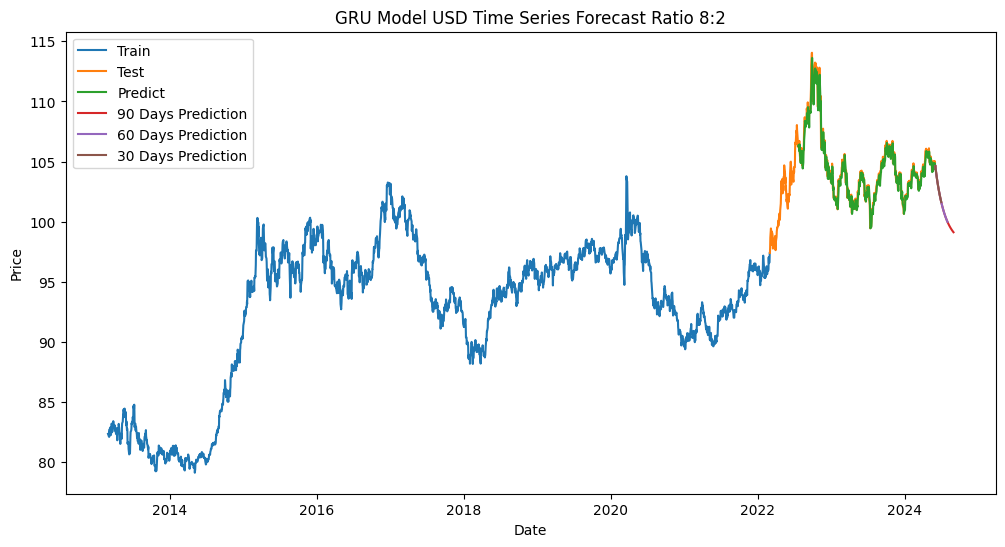

In [99]:
# Drawing
plt.figure(figsize=(12, 6))
dates = pd.to_datetime(data['Date'])

plt.plot(dates[:train_size], scaler.inverse_transform(train_data), label='Train')
plt.plot(dates[train_size:], scaler.inverse_transform(test_data), label='Test')
predicted_test_index_start = train_size + time_step
plt.plot(dates[predicted_test_index_start:predicted_test_index_start + len(y_pred)], y_pred, label='Predict')

last_date = dates.iloc[-1]

future_dates_30 = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=30)
future_30_with_last = np.concatenate((scaler.inverse_transform(test_data[-1].reshape(-1, 1)), pred_30_days), axis=0)
future_dates_60 = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=61)
future_60_with_last = np.concatenate((scaler.inverse_transform(test_data[-1].reshape(-1, 1)), pred_60_days), axis=0)
future_dates_90 = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=91)
future_90_with_last = np.concatenate((scaler.inverse_transform(test_data[-1].reshape(-1, 1)), pred_90_days), axis=0)

# Drawing 90 days
plt.plot(future_dates_90, future_90_with_last[:len(future_dates_90)], label='90 Days Prediction')

# Drawing 60 days
plt.plot(future_dates_60, future_60_with_last[:len(future_dates_60)], label='60 Days Prediction')

# Drawing 30 days
plt.plot(future_dates_30, future_30_with_last[:len(future_dates_30)], label='30 Days Prediction')

plt.legend()
plt.title('GRU Model USD Time Series Forecast Ratio 8:2')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

In [100]:
# Calculate RMSE, MAE, MAPE for the testing set
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
mape = mean_absolute_percentage_error(y_test, y_pred) * 100
test_mae = np.mean(np.abs(y_pred - y_test))

#Print RMSE, MAE, MAPE
print('Testing RMSE:', test_rmse)
print("Testing MAE:",test_mae)
print("Testing MAPE:", mape)

Testing RMSE: 0.549261355283117
Testing MAE: 0.4092767885965517
Testing MAPE: 0.38828233516734506
